#### Import necessary libraries

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merging 12 months of sales into a single file

In [15]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(f"Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("All_months_sales_data.csv", index=False)

#### Read and update dataframe

In [16]:
all_data = pd.read_csv("All_months_sales_data.csv")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### CLEAN UP THE DATA AND DROW ROWS OF NAN

In [17]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Add city column

In [18]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [19]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
def get_city(address):
    return address.split(",")[1]

def get_addr(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " " + get_addr(x))
all_data.head(5)

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\3851245656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\3851245656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\3851245656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


## Data Exploration!

In [20]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\3287761700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco CA,379.99


#### In which city there were the most sales!

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\837213755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("City", as_index=False).sum()


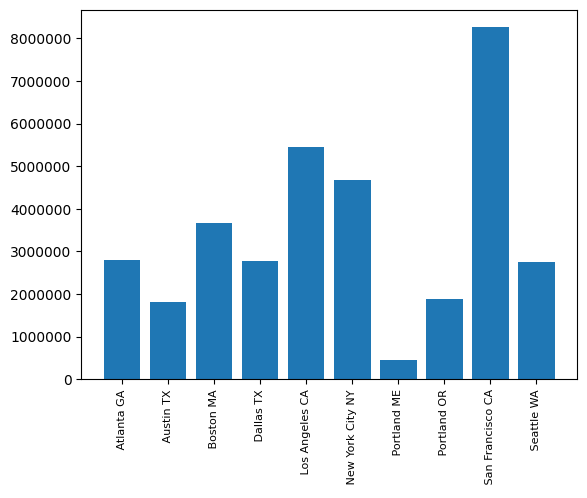

In [21]:
results = all_data.groupby("City", as_index=False).sum()
result = results[["City", "Sales"]]
sales = result["Sales"]
cities = result["City"]
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
ax.bar(cities, result["Sales"])
plt.xticks(cities, rotation="vertical", size=8)
plt.show()

#### What is the best month for sales? How much was earned that month?

In [22]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head(20)

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1436214261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Order Date"].str[0:2]
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1436214261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA,99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,11.99,4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",San Francisco CA,11.95,4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Seattle WA,99.99,4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Atlanta GA,11.95,4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",San Francisco CA,1700.00,4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Boston MA,11.99,4


TASK 3: Add a sales column

In [23]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.groupby(['Month']).sum()

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1238313593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1238313593.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [24]:
results = all_data.groupby(["Month"], as_index=False).sum()
results[["Month", "Sales"]]

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1282825303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby(["Month"], as_index=False).sum()


,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [25]:
import matplotlib.pyplot as plt

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\593784951.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])


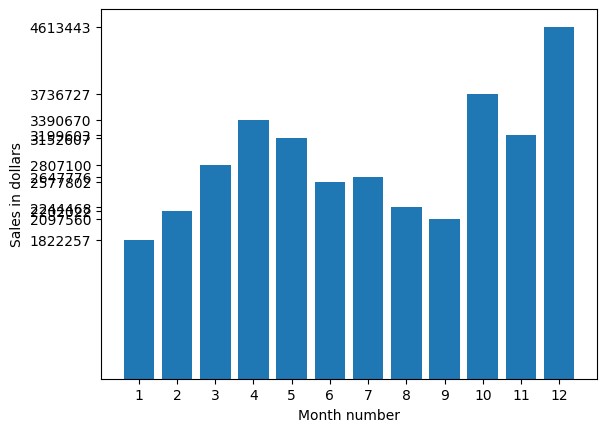

In [26]:
fig, ax = plt.subplots()
months = range(1, 13)
plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.yticks(results["Sales"])
plt.ylabel("Sales in dollars")
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Month number")
plt.show()

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA,99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,11.99,4


In [28]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()


C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\2538961132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\2538961132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"] = all_data["Order Date"].dt.hour
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\2538961132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,23.90,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,99.99,4,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,600.00,4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,11.99,4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,11.99,4,9,27


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

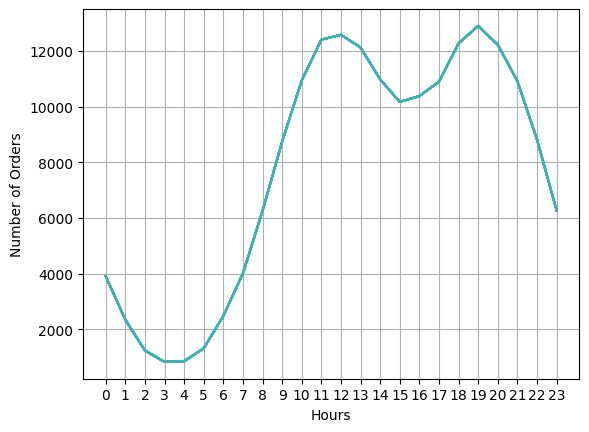

In [29]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.show()

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,23.90,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,99.99,4,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,600.00,4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,11.99,4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,11.99,4,9,27


In [31]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\503805020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


What is the most product sold together?

In [32]:
from itertools import combinations
from collections import Counter

In [33]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
# print(count)
count.most_common(10)
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most?

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\3468843578.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


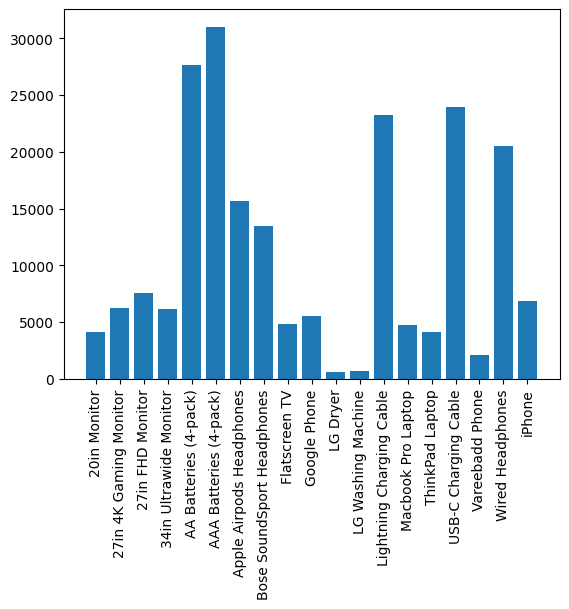

In [34]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
product = [product for product, df in product_group]
plt.bar(product,quantity_ordered)
plt.xticks(rotation="vertical", size=10)
plt.show()

 Why do you think it sold the most?

C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1116012682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()["Price Each"]
C:\Users\Igor\AppData\Local\Temp\ipykernel_21996\1116012682.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical')


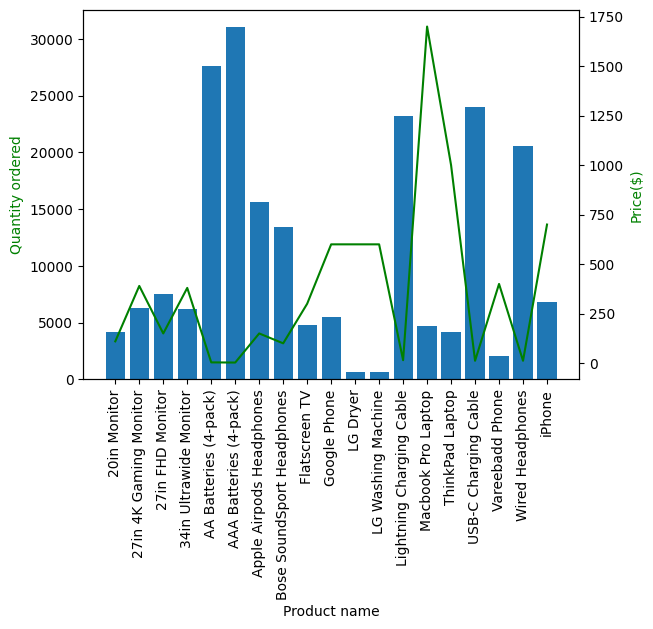

In [35]:
prices = all_data.groupby("Product").mean()["Price Each"]
prices.head(15)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered)
ax2.plot(product, prices, 'g-')

ax1.set_xlabel("Product name")
ax1.set_ylabel("Quantity ordered", color='g')
ax2.set_ylabel("Price($)", color='g')
ax1.set_xticklabels(product, rotation='vertical')
plt.show()